# What is REST API and why to use api?

[REST](https://www.ics.uci.edu/~fielding/pubs/dissertation/rest_arch_style.htm): **Representational State Transfer**

- Architectural style for communication often used in Web service development.
- Uses a stateless operation in client server protocol to manipulate  server resources(image, blog etc.) in the web.

When using [http](https://www.ietf.org/rfc/rfc2616.txt)/https most common available operations are



**GET**: To get the data from server

**POST**: To submit data

**PUT**: to update a resource

**DELETE**: delete the resource


Response will have a payload formatted in HTML, XML, **JSON**, or some other format.

# JSON (Java Script object notation)
json is primary format used for data exchange. python has json library. we can use it to convert python object to string(**dumps method**) and  vice -versa **loads method**.

# Status code for GET request
- 200: success
- 400: bad request
- 401: authentication failure
- 404: resouce not found. Like wrong endpoint

Client applications use URI/URL to access RESTFUL web services.

REST API has __*base url + endpoint+ parameters*__

e.g - https://api.github.com/users
    - https://api.github.com/users/user_id/repos

**Before using python Requests module, let's use curl to see rest API in action**

Using github developer API we can get list of users as

In [1]:
!curl https://api.github.com/users

[
  {
    "login": "mojombo",
    "id": 1,
    "node_id": "MDQ6VXNlcjE=",
    "avatar_url": "https://avatars0.githubusercontent.com/u/1?v=4",
    "gravatar_id": "",
    "url": "https://api.github.com/users/mojombo",
    "html_url": "https://github.com/mojombo",
    "followers_url": "https://api.github.com/users/mojombo/followers",
    "following_url": "https://api.github.com/users/mojombo/following{/other_user}",
    "gists_url": "https://api.github.com/users/mojombo/gists{/gist_id}",
    "starred_url": "https://api.github.com/users/mojombo/starred{/owner}{/repo}",
    "subscriptions_url": "https://api.github.com/users/mojombo/subscriptions",
    "organizations_url": "https://api.github.com/users/mojombo/orgs",
    "repos_url": "https://api.github.com/users/mojombo/repos",
    "events_url": "https://api.github.com/users/mojombo/events{/privacy}",
    "received_events_url": "https://api.github.com/users/mojombo/received_events",
    "type": "User",
    "site_admin": false
  },
  {
    "

# [Requests: HTTP for Humans](http://docs.python-requests.org/en/master/)

From the website

**"*Requests allows you to send organic, grass-fed HTTP/1.1 requests, without the need for manual labor.*"**

Let's try to get NASA data using web API

In [2]:
import requests

## APOD( Astronomy Picture of the Day)
For passing parameters to the API using python dictionary

In [10]:
parameters = {"api_key":"DEMO_KEY"}
response = requests.get("https://api.nasa.gov/planetary/apod", params=parameters)

In [11]:
print(response.status_code)

200


Codes are available as

In [12]:
requests.codes.ok

200

In [13]:
response.headers

{'Server': 'openresty', 'Date': 'Tue, 05 Feb 2019 02:26:16 GMT', 'Content-Type': 'application/json', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-RateLimit-Limit': '40', 'X-RateLimit-Remaining': '26', 'Via': '1.1 vegur, http/1.1 api-umbrella (ApacheTrafficServer [cMsSf ])', 'Age': '0', 'X-Cache': 'MISS', 'Access-Control-Allow-Origin': '*', 'Strict-Transport-Security': 'max-age=31536000; preload', 'Content-Encoding': 'gzip'}

In [14]:
response.text

'{"copyright":"Josep M. Drudis","date":"2019-02-04","explanation":"Massive stars profoundly affect their galactic environments.  Churning and mixing interstellar clouds of gas and dust, stars -- most notably those upwards of tens of times the mass of our Sun -- leave their mark on the compositions and locations of future generations of stars.  Dramatic evidence of this is illustrated in our neighboring galaxy, the Large Magellanic Cloud (LMC), by the featured nebula, Henize 70 (also known as N70 and DEM301).  Henize 70 is actually a luminous superbubble of interstellar gas about 300 light-years in diameter, blown by winds from hot, massive stars and supernova explosions, with its interior filled with tenuous hot and expanding gas.  Because superbubbles can expand through an entire galaxy, they offer humanity a chance to explore the connection between the lifecycles of stars and the evolution of galaxies.","hdurl":"https://apod.nasa.gov/apod/image/1902/N70_Durdis_2000.jpg","media_type":

In [15]:
json_data = response.json()
type(json_data)

dict

In [16]:
#!pip install pillow

In [17]:
from PIL import Image
from io import BytesIO
response = requests.get(json_data['url'])
img = Image.open(BytesIO(response.content))

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt


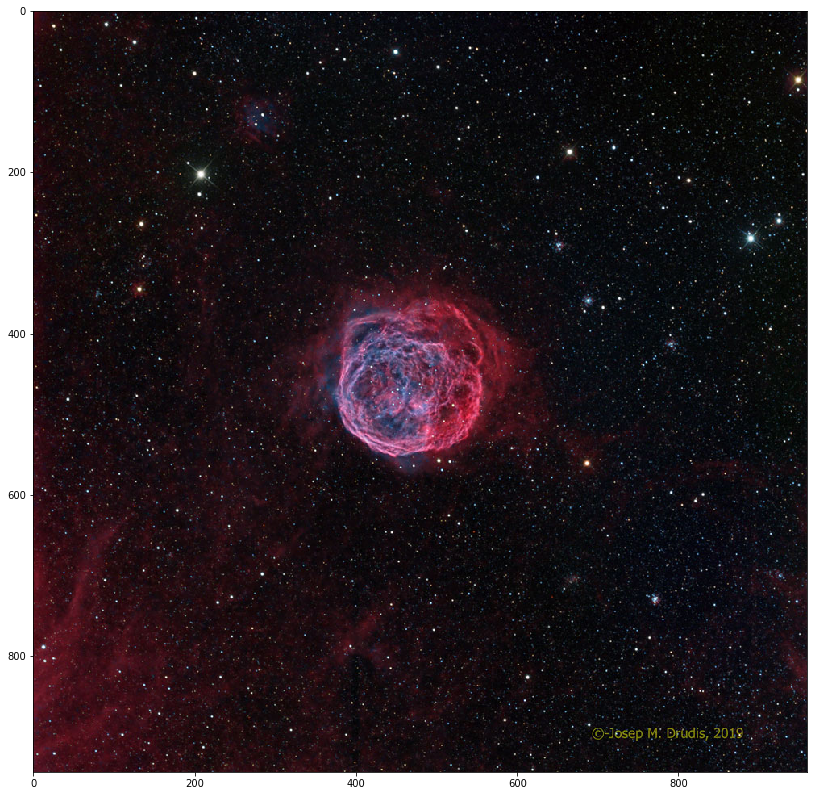

In [19]:
fig, ax = plt.subplots(figsize=(14, 14))
ax.imshow(img)

## Mars rovers photo

In [20]:
parameters = {"api_key":"DEMO_KEY", "sol":1000, "camera":"fhaz"}
api_end_point= "https://api.nasa.gov/mars-photos/api/v1/rovers/curiosity/photos"
response = requests.get(api_end_point, params=parameters)
response.status_code

200

In [21]:
json_data = response.json()
json_data

{'photos': [{'id': 102693,
   'sol': 1000,
   'camera': {'id': 20,
    'name': 'FHAZ',
    'rover_id': 5,
    'full_name': 'Front Hazard Avoidance Camera'},
   'img_src': 'http://mars.jpl.nasa.gov/msl-raw-images/proj/msl/redops/ods/surface/sol/01000/opgs/edr/fcam/FLB_486265257EDR_F0481570FHAZ00323M_.JPG',
   'earth_date': '2015-05-30',
   'rover': {'id': 5,
    'name': 'Curiosity',
    'landing_date': '2012-08-06',
    'launch_date': '2011-11-26',
    'status': 'active',
    'max_sol': 2309,
    'max_date': '2019-02-03',
    'total_photos': 347007,
    'cameras': [{'name': 'FHAZ', 'full_name': 'Front Hazard Avoidance Camera'},
     {'name': 'NAVCAM', 'full_name': 'Navigation Camera'},
     {'name': 'MAST', 'full_name': 'Mast Camera'},
     {'name': 'CHEMCAM', 'full_name': 'Chemistry and Camera Complex'},
     {'name': 'MAHLI', 'full_name': 'Mars Hand Lens Imager'},
     {'name': 'MARDI', 'full_name': 'Mars Descent Imager'},
     {'name': 'RHAZ', 'full_name': 'Rear Hazard Avoidance Came

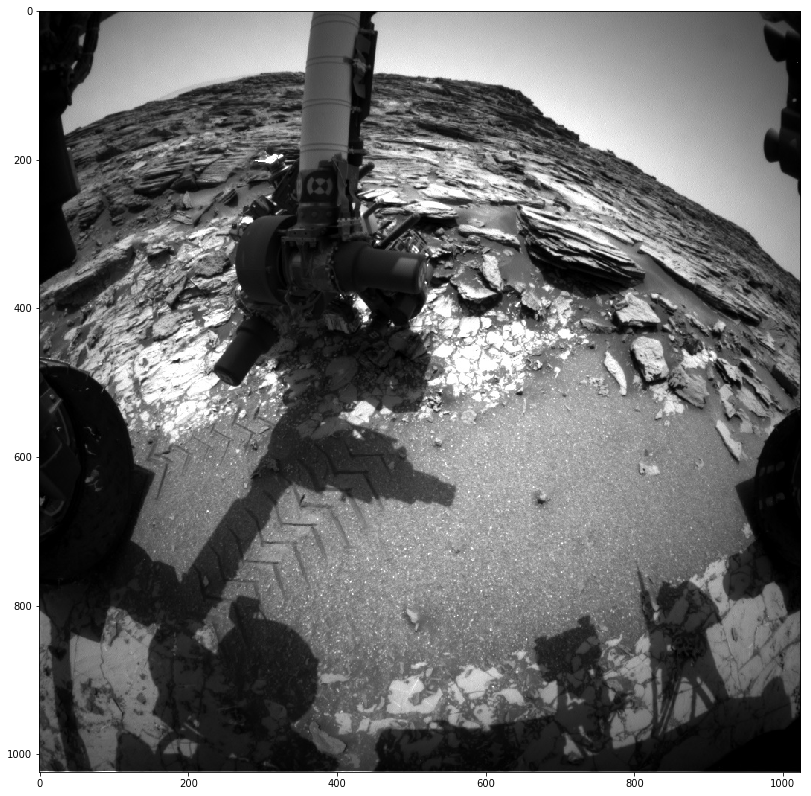

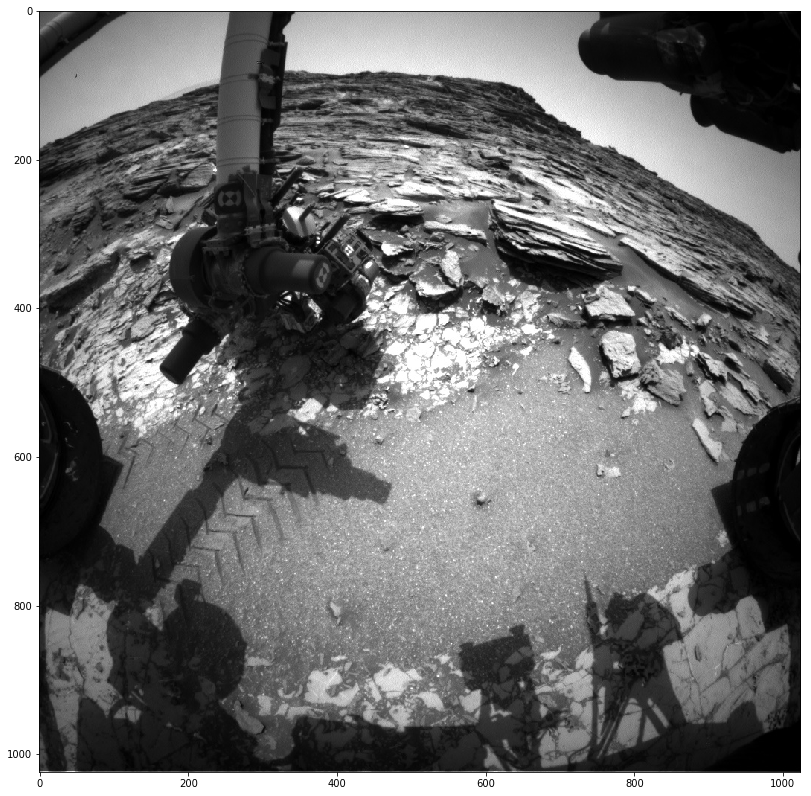

In [22]:

for image_data in json_data['photos']:
    response = requests.get(image_data['img_src'])
    fig, ax = plt.subplots(figsize=(14, 14))
    img = Image.open(BytesIO(response.content))
    ax.imshow(img)

# Twitter example with POST and GET

1. create new app at https://apps.twitter.com/app/new
1. [twitter api reference index](https://developer.twitter.com/en/docs/api-reference-index)


# POST oauth2/token
Allows a registered application to obtain an OAuth 2 Bearer Token, which can be used to make API requests on an application's own behalf, without a user context.
https://developer.twitter.com/en/docs/basics/authentication/api-reference/token


In [23]:
client_key = 'cMAKpOIAiLXtsYsvYHSyy4ISJ'
client_secret = 'sqH2RBkSrX4I0GmqGb7uLAausxHVaUg86umAIyQ4fjPtwF4bmR'

In [24]:
import base64

key_secret = '{}:{}'.format(client_key, client_secret).encode('ascii')
b64_encoded_key = base64.b64encode(key_secret)
b64_encoded_key = b64_encoded_key.decode('ascii')

In [25]:
base_url = 'https://api.twitter.com/'
auth_endpoint = base_url+'oauth2/token'

auth_headers = { 'Authorization': 'Basic {}'.format(b64_encoded_key),
                'Content-Type': 'application/x-www-form-urlencoded;charset=UTF-8'}

auth_data = { 'grant_type': 'client_credentials'}



Let's post to authentication endpoint and get the token to be used in subsequent REST API call

In [27]:
response = requests.post(auth_endpoint, headers=auth_headers, data=auth_data)
response.status_code

200

In [28]:
json_data =  response.json()
json_data

{'token_type': 'bearer',
 'access_token': 'AAAAAAAAAAAAAAAAAAAAAEGe9QAAAAAALnCjfdkTP%2FJGQxEZOPTqGQL7jUs%3DTVrscEzlzvKPhNerXde7Btkx2aJ2TYtpuCpaHC3TwRfIKnX4vL'}

In [29]:
access_token = json_data['access_token']

# Let's do some search on climate change
This is how we got search endpoint

https://developer.twitter.com/en/docs/tweets/search/api-reference/get-search-tweets

In [30]:
search_headers = {'Authorization': 'Bearer {}'.format(access_token)    
}

parameters = { 'q': 'climate change',
                    'result_type': 'recent',
                'count': 5 }

search_url = base_url+'1.1/search/tweets.json'

response = requests.get(search_url, headers=search_headers, params=parameters)

In [31]:
json_tweet_data = response.json()
json_tweet_data

{'statuses': [{'created_at': 'Tue Feb 05 02:45:18 +0000 2019',
   'id': 1092615118410665984,
   'id_str': '1092615118410665984',
   'text': 'RT @curaffairs: those responsible for knowingly  accelerating climate change must be held legally liable and forced to pay damages. this is…',
   'truncated': False,
   'entities': {'hashtags': [],
    'symbols': [],
    'user_mentions': [{'screen_name': 'curaffairs',
      'name': 'Current Affairs',
      'id': 4128420672,
      'id_str': '4128420672',
      'indices': [3, 14]}],
    'urls': []},
   'metadata': {'iso_language_code': 'en', 'result_type': 'recent'},
   'source': '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>',
   'in_reply_to_status_id': None,
   'in_reply_to_status_id_str': None,
   'in_reply_to_user_id': None,
   'in_reply_to_user_id_str': None,
   'in_reply_to_screen_name': None,
   'user': {'id': 488045282,
    'id_str': '488045282',
    'name': 'zesty lemon',
    'screen_name': 'TheOneForeigner',
    

In [33]:
for status in json_tweet_data['statuses']:
    print(status['text'] + '\n')

RT @curaffairs: those responsible for knowingly  accelerating climate change must be held legally liable and forced to pay damages. this is…

RT @PeterGleick: The Trump administration did its best to bury the threat of #climatechange in the new 2019 defense intelligence assessment…

RT @RepCunningham: When you are from the Lowcountry, you live with the consequences of rising sea levels and climate change everyday. How h…

RT @KamalaHarris: We can’t lose sight of some of the critical issues that matter, from reproductive rights to climate change.
https://t.co/…

RT @GretaThunberg: “A third of Himalayan ice cap doomed, finds report. 
Even radical climate change action won’t save glaciers, endangering…

